In [3]:
import numpy as np
import astropy.units as u

import poppy

import lina
from lina.imshows import *

from importlib import reload


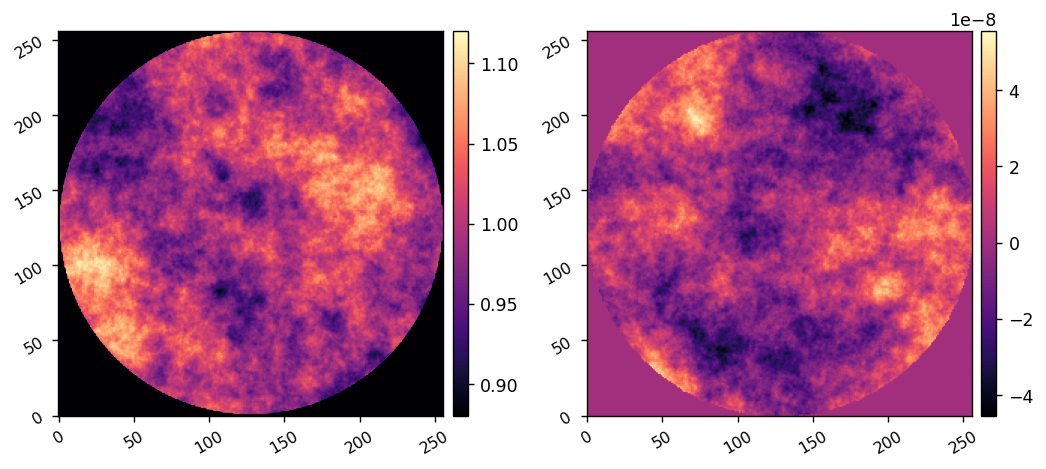

In [14]:
# reload(lina.tests.mock_model)
from lina.tests.mock_model import CORONAGRAPH, IdealAGPM

wavelength = 650*u.nm
pupil_diam = 10.0*u.mm
npix = 256
oversample = 8

reload(lina.utils)
wfe = lina.utils.generate_wfe(diam=pupil_diam, wavelength=wavelength,
                 opd_index=2.8, amp_index=2.8, 
                 opd_seed=1, amp_seed=12,
                 opd_rms=20*u.nm, amp_rms=0.04,
                 npix=npix, oversample=1,
                 plot=True)

WFE = poppy.ArrayOpticalElement(transmission=xp.abs(wfe), opd=xp.angle(wfe)*wavelength.to_value(u.m)/(2*np.pi), 
                                pixelscale=pupil_diam/(npix*u.pix))

FPM = IdealAGPM(name='Vortex', wavelength=wavelength, charge=6)

LYOT = poppy.CircularAperture(radius=0.9*pupil_diam/2, )

INFO:poppy:Loaded influence function from inf.fits for DM
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=5.0 mm
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added pupil plane: DM
INFO:poppy:Added image plane: Intermediate Image Plane
INFO:poppy:Added pupil plane: Apodizer Place-holder
INFO:poppy:Added image plane: FPM Place-holder
INFO:poppy:Added pupil plane: Lyot Stop Place-holder
INFO:poppy:Added detector with pixelscale=26.814424812122525 and oversampling=8: Detector
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=5.0 mm
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added pupil plane: DM
INFO:poppy:Added image plane: Intermediate Image Plane
INFO:poppy:Added pupil plane: Apodizer Place-holder
INFO:poppy:Added image plane: FPM Place-holder
INFO:poppy:Added pupil plane: Lyot Stop Place-holder
INFO:poppy:Added detector with pixelscale=26.814424812122525 and oversampl

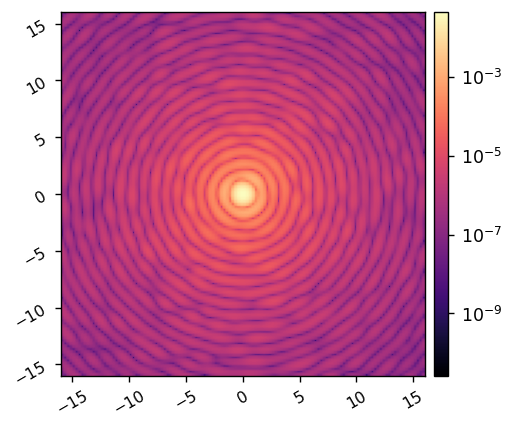

In [15]:
model = CORONAGRAPH(wavelength=wavelength, npix=npix, oversample=oversample, 
                    WFE=WFE)

im = model.snap()
imshow1(im, lognorm=True, pxscl=model.psf_pixelscale_lamD)

model.Imax_ref = im.max()

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=5.0 mm
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added pupil plane: DM
INFO:poppy:Added image plane: Intermediate Image Plane
INFO:poppy:Added pupil plane: Apodizer Place-holder
INFO:poppy:Added image plane: Vortex
INFO:poppy:Added pupil plane: Lyot Stop Place-holder
INFO:poppy:Added detector with pixelscale=26.814424812122525 and oversampling=8: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
INFO:poppy:Using user-defined Wavefront() for the input wavefront of the OpticalSystem().
INFO:poppy:  Calculation completed in 0.087 s
INFO:poppy:PSF Calculation completed.


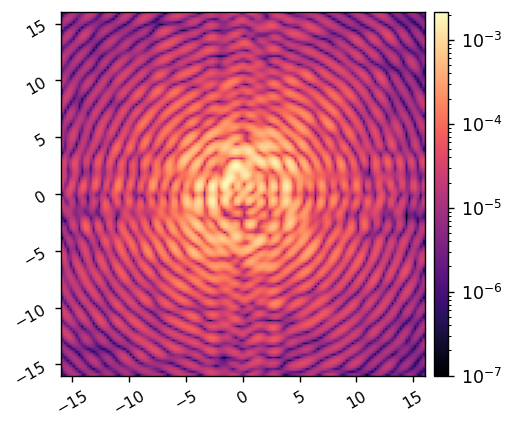

In [16]:
model.FPM = FPM
im = model.snap()
imshow1(im, lognorm=True, vmin=1e-7, pxscl=model.psf_pixelscale_lamD)
